Problem Description

Travelling in and around Seatle City is not unlike any situation travelling around any city or on any public raodway.  When traffic stops or backs up for miles, drivers are often wondering how long it will take to clear and if an alternate route should be found.  Modern vehicles with modern GPS systems use Predictive Traffic feature which gives the driver an understanding of of the traffic patterns and possible delays using real time traffic monitoring and integrated navigation to find a more efficinet route in th event of an accident or slowdown.  In this analysis I want to use the shared sample data set to predict the severity of an accident.  This could be used to feed such a system or an electronic highway sign to re-route traffic in the case of a severe accident or fatality.

Data Desciption

I plan to use the share data set example of Seattle City for my analysis.  The data requires balancing, pre-processing and cleaning before it can be used to train and test the model.  The model will use the severity code as the target label and the rest of the labels, as determined by pre-processing and exploratory analysis, will be used as predictors.  The following is a preliminary download and exploration of the data set.

In [1]:
# Importing the necessary tools for the preliminary exploration of the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# Downloading the sample data set

In [4]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
print('Download Completed!')

--2020-09-19 19:21:34--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.1MB/s   in 1.6s   

2020-09-19 19:21:36 (43.1 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]

Download Completed!


In [5]:
# Initial look at the columns and label types

In [6]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
# determining if the data set has enough rows for analysis

In [8]:
df.shape

(194673, 38)

In [9]:
# Determining missing data

In [10]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [12]:
# Determimng data types for potential mis-matches

In [13]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [14]:
# The following block of code is used for iteratively for labels from above to determine the counts of each type

In [15]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [16]:
# Code below is to determine balancing requirements of potential labels identified above

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [18]:
# Dropping of some of the label determined as non essential to the analysis (some may be added back at a later time)

In [19]:
df.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','PEDROWNOTGRNT','INCDATE','SDOTCOLNUM','ST_COLDESC','UNDERINFL','SDOT_COLDESC','INATTENTIONIND','INCDTTM'], axis=1, inplace=True)

In [20]:
# Another look at the data

In [21]:
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,Overcast,Wet,Daylight,NaN,10,0,0,N
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,Raining,Wet,Dark - Street Lights On,NaN,11,0,0,N
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,Overcast,Dry,Daylight,NaN,32,0,0,N
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),11,Clear,Dry,Daylight,NaN,23,0,0,N
4,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,Raining,Wet,Daylight,NaN,10,0,0,N


In [22]:
# Value counts below are used iteratively as a guide to replacing object type to int. in the code several lines below

In [23]:
test_count=df['HITPARKEDCAR'].value_counts().to_frame()

In [24]:
test_count

,HITPARKEDCAR
N,187457
Y,7216


In [25]:
df['ADDRTYPE'] = df['ADDRTYPE'].replace(['Block','Intersection','Alley'],['1','2','3',])

In [26]:
df['SEVERITYDESC'] = df['SEVERITYDESC'].replace(['Property Damage Only Collision','Injury Collision'],['1','2'])

In [27]:
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'],['1','2','3','4','5','6','7','8','9','10'])

In [28]:
df['WEATHER'] = df['WEATHER'].replace(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],['1','2','3','4','5','6','7','8','9','10','11'])

In [29]:
df['ROADCOND'] = df['ROADCOND'].replace(['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'],['1','2','3','4','5','6','7','8','9'])

In [30]:
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'],['1','2','3','4','5','6','7','8','9'])

In [31]:
df['SPEEDING'] = df['SPEEDING'].replace(['Y'],['1'])

In [32]:
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(['Mid-Block (not related to intersection)','At Intersection (intersection related)','Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction','Unknown'],['1','2','3','4','5','6','7'])

In [33]:
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].replace(['Y','N'],['1','2'])

In [34]:
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,2,2,2,2,0,0,2,2,11,3,2,1,NaN,10,0,0,2
1,1,1,1,5,2,0,0,2,1,16,2,2,2,NaN,11,0,0,2
2,1,1,1,1,4,0,0,3,1,14,3,1,1,NaN,32,0,0,2
3,1,1,1,4,3,0,0,3,1,11,1,1,1,NaN,23,0,0,2
4,2,2,2,2,2,0,0,2,2,11,2,2,1,NaN,10,0,0,2


In [35]:
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,2,2,2,2,0,0,2,2,11,3,2,1,NaN,10,0,0,2
1,1,1,1,5,2,0,0,2,1,16,2,2,2,NaN,11,0,0,2
2,1,1,1,1,4,0,0,3,1,14,3,1,1,NaN,32,0,0,2
3,1,1,1,4,3,0,0,3,1,11,1,1,1,NaN,23,0,0,2
4,2,2,2,2,2,0,0,2,2,11,2,2,1,NaN,10,0,0,2


In [36]:
# Dropped the NaN in the SPEEDING label

In [37]:
df.dropna(subset=['SPEEDING'], axis=0, inplace=True)

In [38]:
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
24,2,2,2,3,3,0,0,2,2,14,1,1,1,1,14,0,0,2
43,2,1,2,4,1,0,0,1,1,28,2,2,2,1,50,0,0,2
62,1,1,1,1,4,0,0,4,3,14,1,1,1,1,32,0,0,2
123,1,1,1,3,2,0,0,2,1,14,2,2,1,1,14,0,0,2
124,2,2,2,2,2,0,0,2,2,14,1,1,1,1,10,0,0,2


In [39]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
124,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
# Data set looks more balanced

In [41]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    9333
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    9279
True       54
Name: ADDRTYPE, dtype: int64

SEVERITYDESC
False    9333
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    9332
True        1
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    9333
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    9333
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    9333
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    9333
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    9223
True      110
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    9333
Name: SDOT_COLCODE, dtype: int64

WEATHER
False    9325
True        8
Name: WEATHER, dtype: int64

ROADCOND
False    9330
True        3
Name: ROADCOND, dtype: int64

LIGHTCOND
False    9328
True        5
Name: LIGHTCOND, dtype: int64

SPEEDING
False    9333
Name: SPEEDING, dtype: int64

ST_COLCODE
False    9332
True        1
Name: ST_COLCODE, dtype: int64

SEGLANEKEY
False    9333
Name: SEGLANEKEY, dtype:

In [42]:
df.loc[:, df.isnull().any()].columns

Index(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE'],
      dtype='object')

In [43]:
df.describe(include='all')

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,9333.000000,9279,9333,9332,9333.000000,9333.000000,9333.000000,9333.000000,9223,9333.000000,9325,9330,9328,9333,9332,9333.000000,9333.000000,9333
unique,NaN,3,2,10,NaN,NaN,NaN,NaN,7,NaN,10,9,8,1,78,NaN,NaN,2
top,NaN,1,1,4,NaN,NaN,NaN,NaN,1,NaN,1,2,1,1,50,NaN,NaN,2
freq,NaN,7284,5802,3744,NaN,NaN,NaN,NaN,5287,NaN,4111,4402,4505,9333,1989,NaN,NaN,9210
mean,1.378335,NaN,NaN,NaN,2.426658,0.008143,0.013179,1.848387,NaN,18.297332,NaN,NaN,NaN,NaN,NaN,169.751848,1570.533269,NaN
std,0.484998,NaN,NaN,NaN,1.499716,0.094525,0.114983,0.862024,NaN,8.058973,NaN,NaN,NaN,NaN,NaN,5675.629577,29028.640617,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,1.000000,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,2.000000,NaN,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


In [44]:
df.dropna(subset=["ADDRTYPE","SEVERITYCODE","COLLISIONTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","ST_COLCODE","SEGLANEKEY","CROSSWALKKEY","HITPARKEDCAR"], axis=0, inplace=True)

In [45]:
df.describe(include='all')

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,9193.000000,9193,9193,9193,9193.000000,9193.000000,9193.000000,9193.000000,9193,9193.000000,9193,9193,9193,9193,9193,9193.000000,9193.000000,9193
unique,NaN,3,2,10,NaN,NaN,NaN,NaN,7,NaN,10,9,8,1,78,NaN,NaN,2
top,NaN,1,1,4,NaN,NaN,NaN,NaN,1,NaN,1,2,1,1,50,NaN,NaN,2
freq,NaN,7221,5701,3657,NaN,NaN,NaN,NaN,5265,NaN,4061,4329,4444,9193,1934,NaN,NaN,9076
mean,1.379854,NaN,NaN,NaN,2.433264,0.008158,0.013162,1.852932,NaN,18.500925,NaN,NaN,NaN,NaN,NaN,172.336996,1594.450887,NaN
std,0.485377,NaN,NaN,NaN,1.499612,0.094673,0.114926,0.862953,NaN,7.856471,NaN,NaN,NaN,NaN,NaN,5718.649010,29248.215565,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,1.000000,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,2.000000,NaN,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


In [46]:
test_count=df['ADDRTYPE'].value_counts().to_frame()

In [47]:
test_count

,ADDRTYPE
1,7221
2,1955
3,17


In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [49]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [50]:
df.drop(['SEVERITYDESC','COLLISIONTYPE','PEDCOUNT','PEDCYLCOUNT','SDOT_COLCODE','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'], axis=1, inplace=True)

In [51]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING'],
      dtype='object')

# KNN Method

In [52]:
#This methodology will focus on using attributes that may contribute or predict the severity of an accident./
#The values used are, addrtype, personcount, vehcount, junctiontype, weather, roadcond, lightcond, speeding to predict the severitcode.
#The targe, severitycode, has two possible values that correspond to accident severity, Basic Property Damage or Injury Collision
#My objective is to build a classifier, to predict the accident severity using K nearest neighbour.

In [53]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING'],
      dtype='object')

In [54]:
#Convert Pandas dataframe to Numpy array

In [55]:
X = df[['ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']] .values  #.astype(float)
X[0:5]

array([['2', 3, 2, '2', '1', '1', '1', '1'],
       ['1', 1, 1, '1', '2', '2', '2', '1'],
       ['1', 4, 4, '3', '1', '1', '1', '1'],
       ['1', 2, 2, '1', '2', '2', '1', '1'],
       ['2', 2, 2, '2', '1', '1', '1', '1']], dtype=object)

In [56]:
#Labels

In [57]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 2])

In [58]:
#Normalize the Data

In [59]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.88271082,  0.37794197,  0.17043397,  0.29672887, -0.82338369,
        -0.75637945, -0.67495399,  0.        ],
       [-0.51981008, -0.9558087 , -0.98844136, -0.73968014,  0.13597832,
         0.27101362,  0.21120026,  0.        ],
       [-0.51981008,  1.0448173 ,  2.48818462,  1.33313788, -0.82338369,
        -0.75637945, -0.67495399,  0.        ],
       [-0.51981008, -0.28893337,  0.17043397, -0.73968014,  0.13597832,
         0.27101362, -0.67495399,  0.        ],
       [ 1.88271082, -0.28893337,  0.17043397,  0.29672887, -0.82338369,
        -0.75637945, -0.67495399,  0.        ]])

In [60]:
#Split the Data into a train and test set

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7354, 8) (7354,)
Test set: (1839, 8) (1839,)


In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
#Training

In [64]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [65]:
#Predicting

In [66]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 1])

In [67]:
#Accuracy Evaluation

In [68]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6558335599673647
Test set Accuracy:  0.601957585644372


In [69]:
#Model using different K's

In [70]:
k = 2
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.6604568942072342
Test set Accuracy:  0.6155519303969549


In [71]:
k = 4
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.6558335599673647
Test set Accuracy:  0.601957585644372


In [72]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.6589611096002176
Test set Accuracy:  0.6057640021750952


In [73]:
k = 8
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.6603209137884145
Test set Accuracy:  0.6144643828167482


In [74]:
k = 10
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.6593690508566766
Test set Accuracy:  0.6155519303969549


In [75]:
k = 12
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.657465324993201
Test set Accuracy:  0.6068515497553018


In [76]:
#Accuracy of KNN for differnt K's

In [77]:
Ks = 8
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56063078, 0.61555193, 0.58346928, 0.60195759, 0.5829255 ,
       0.605764  , 0.59978249])

In [78]:
#Plotting Accuracy using best K from above

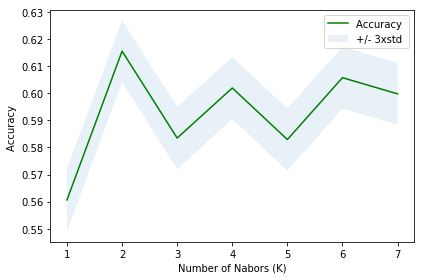

In [79]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [80]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6155519303969549 with k= 2


# Decision Tree

In [81]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [82]:
#Pre-Processing

In [83]:
X = df[['ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']] .values  #.astype(float)
X[0:5]

array([['2', 3, 2, '2', '1', '1', '1', '1'],
       ['1', 1, 1, '1', '2', '2', '2', '1'],
       ['1', 4, 4, '3', '1', '1', '1', '1'],
       ['1', 2, 2, '1', '2', '2', '1', '1'],
       ['2', 2, 2, '2', '1', '1', '1', '1']], dtype=object)

In [84]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 2])

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [86]:
#Setting up the Tree/Splitting the Data

In [87]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [88]:
print("X_trainset:", X_trainset.shape)
print("y_trainset:", y_trainset.shape)

X_trainset: (6435, 8)
y_trainset: (6435,)


In [89]:
print("X_testset:", X_testset.shape)
print("y_testset:", y_testset.shape)

X_testset: (2758, 8)
y_testset: (2758,)


In [90]:
#Modeling the Data

In [91]:
accidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
accidentTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
accidentTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
#Predict on the Test Dataset

In [94]:
accidentTree = accidentTree.predict(X_testset)

In [95]:
print (accidentTree [0:5])
print (y_testset [0:5])


[1 2 1 1 1]
[1 1 1 1 2]


In [96]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, accidentTree))

DecisionTrees's Accuracy:  0.631979695431472


# Logistic Regression

In [97]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [98]:
#Pre-Processing

In [99]:
#Defining X and Y for the Dataset

In [100]:
X = df[['ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']] .values  #.astype(float)
X[0:5]

array([['2', 3, 2, '2', '1', '1', '1', '1'],
       ['1', 1, 1, '1', '2', '2', '2', '1'],
       ['1', 4, 4, '3', '1', '1', '1', '1'],
       ['1', 2, 2, '1', '2', '2', '1', '1'],
       ['2', 2, 2, '2', '1', '1', '1', '1']], dtype=object)

In [101]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 2])

In [102]:
#Normalize the Data

In [103]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.88271082,  0.37794197,  0.17043397,  0.29672887, -0.82338369,
        -0.75637945, -0.67495399,  0.        ],
       [-0.51981008, -0.9558087 , -0.98844136, -0.73968014,  0.13597832,
         0.27101362,  0.21120026,  0.        ],
       [-0.51981008,  1.0448173 ,  2.48818462,  1.33313788, -0.82338369,
        -0.75637945, -0.67495399,  0.        ],
       [-0.51981008, -0.28893337,  0.17043397, -0.73968014,  0.13597832,
         0.27101362, -0.67495399,  0.        ],
       [ 1.88271082, -0.28893337,  0.17043397,  0.29672887, -0.82338369,
        -0.75637945, -0.67495399,  0.        ]])

In [104]:
#Split the Dataset into Train/Test

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7354, 8) (7354,)
Test set: (1839, 8) (1839,)


In [106]:
#Modeling

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
#Predicitng

In [109]:
yhat = LR.predict(X_test)
yhat

array([2, 1, 1, ..., 1, 2, 1])

In [110]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.39408398, 0.60591602],
       [0.5727948 , 0.4272052 ],
       [0.69583502, 0.30416498],
       ...,
       [0.65325331, 0.34674669],
       [0.39601753, 0.60398247],
       [0.57933837, 0.42066163]])

In [111]:
#Accuracy

In [112]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6286025013594345

In [113]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6533870111035934

In [114]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5661237417407249